In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
data = pd.read_csv('Credit Card Customer Data.csv')
data.drop(columns=['Sl_No'], inplace = True)
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [3]:
data.shape

(660, 6)

*Checking for missing values*

In [4]:
data.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

*Checking Unique Values*

In [5]:
data.nunique()

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [6]:
data.drop(columns='Customer Key', inplace=True)

*Checking for duplicates values*

In [7]:
data.duplicated().sum()

11

*Dropping duplicates*

In [8]:
data.drop_duplicates(inplace= True)

**EDA**

*Checking distribution of the features*

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,649.0,34878.274268,37813.736638,3000.0,11000.0,18000.0,49000.0,200000.0
Total_Credit_Cards,649.0,4.708783,2.173763,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,649.0,2.397535,1.625148,0.0,1.0,2.0,4.0,5.0
Total_visits_online,649.0,2.624037,2.952888,0.0,1.0,2.0,4.0,15.0
Total_calls_made,649.0,3.590139,2.877911,0.0,1.0,3.0,5.0,10.0


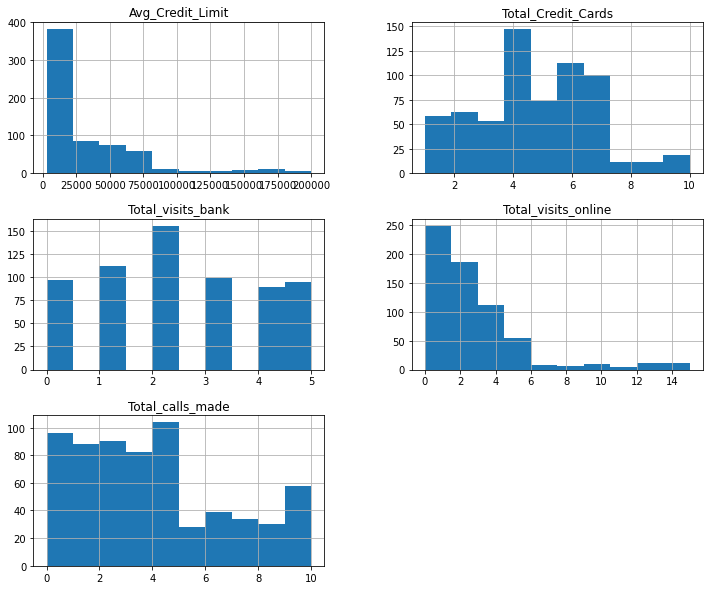

In [10]:
data.hist(figsize=(12,10), layout=(3,2));

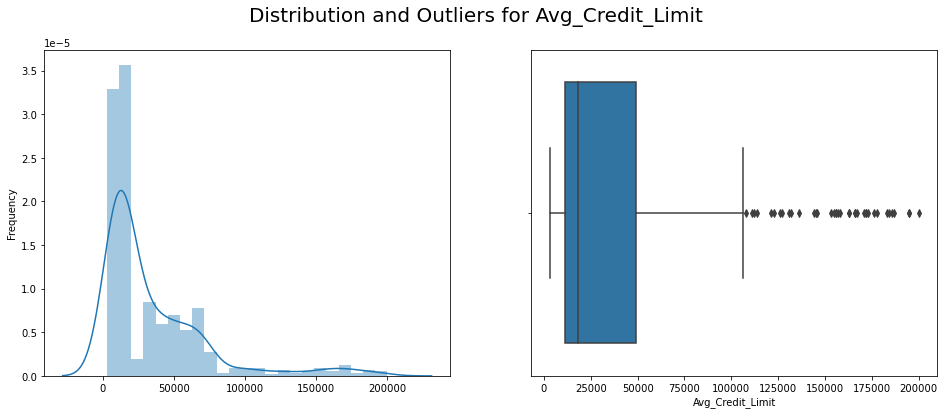

-------------------------------------------------------------------------------


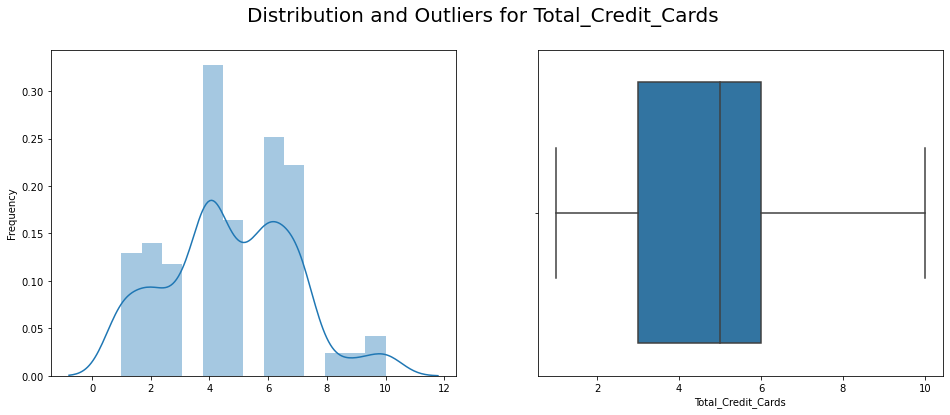

-------------------------------------------------------------------------------


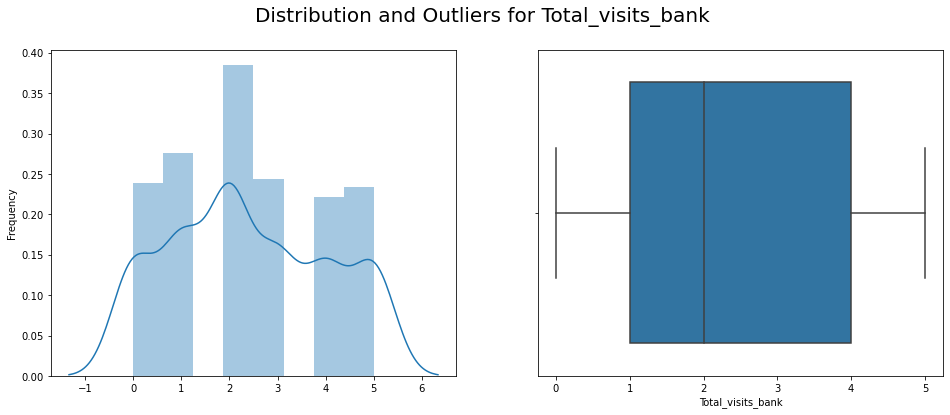

-------------------------------------------------------------------------------


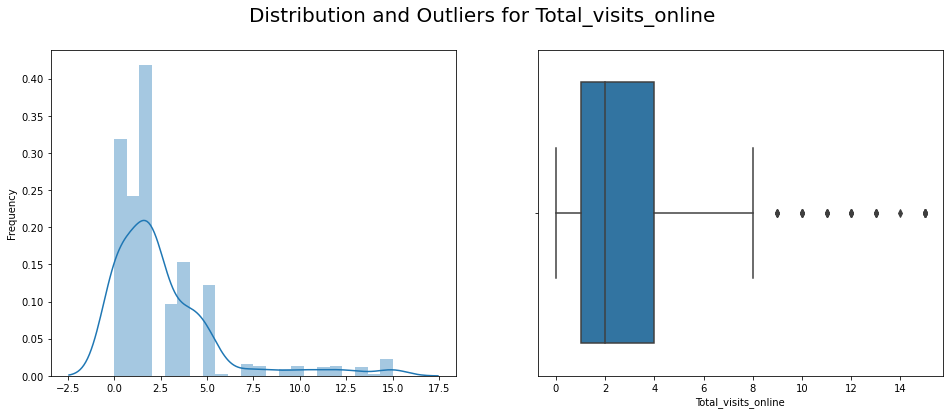

-------------------------------------------------------------------------------


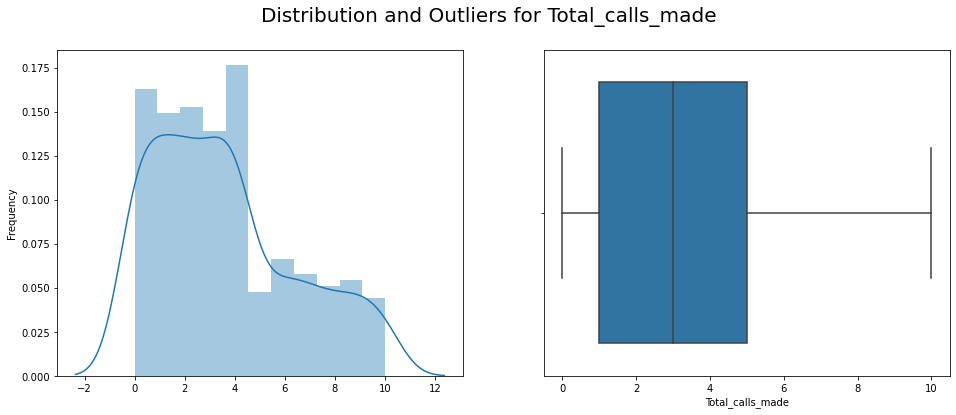

-------------------------------------------------------------------------------


In [11]:
for col in data.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    sns.distplot(ax=ax1, x=data[col])
    ax1.set_ylabel('Frequency')
    sns.boxplot(ax=ax2, x=data[col])
    fig.suptitle('Distribution and Outliers for '+ col, fontsize=20)
    plt.show()
    print('-'*79)

*The average credit card limit is highly skewed and has many outliers.*

**Checking correlation between features**

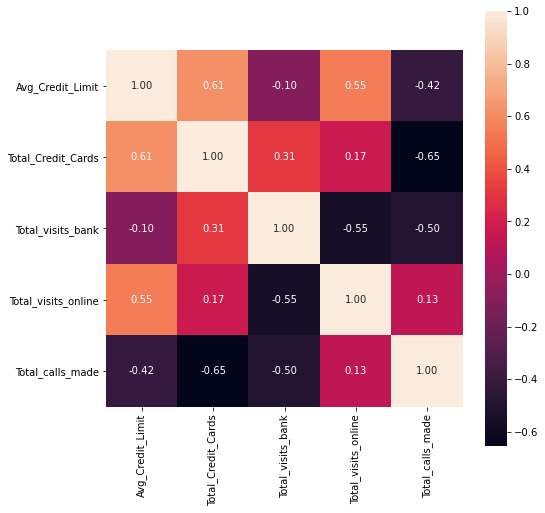

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, square=True, fmt='0.2f')
plt.show()

**Scaling the data**

In [13]:
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

**Clustering**

### KMeans

*Finding optimum number of cluster using Elbow Methods*

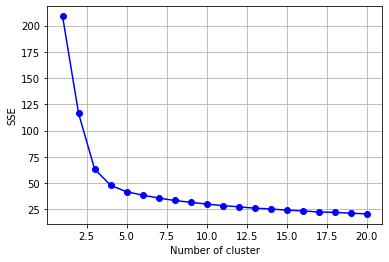

In [14]:
sse = []  #sum of squared distance

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(scaled_data)
    sse.append(kmeans.inertia_)

# plotting the elbow plot
plt.figure()
plt.plot([k for k in range(1, 21)], sse, 'bo-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.grid()
plt.show()

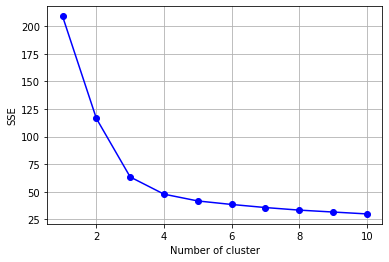

In [15]:
# plotting the elbow plot
plt.figure()
plt.plot([k for k in range(1, 11)], sse[:10], 'bo-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.grid()
plt.show()

*k = 3 seem to be the best k, as the elbow point is achieved at that point*

*Making Predictions*

In [16]:
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=0) 
kmeans.fit(scaled_data)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [17]:
data['Labels'] = kmeans.predict(scaled_data)

**Observations**

In [18]:
data.Labels.value_counts()

1    377
0    222
2     50
Name: Labels, dtype: int64

**Visualizing different features**

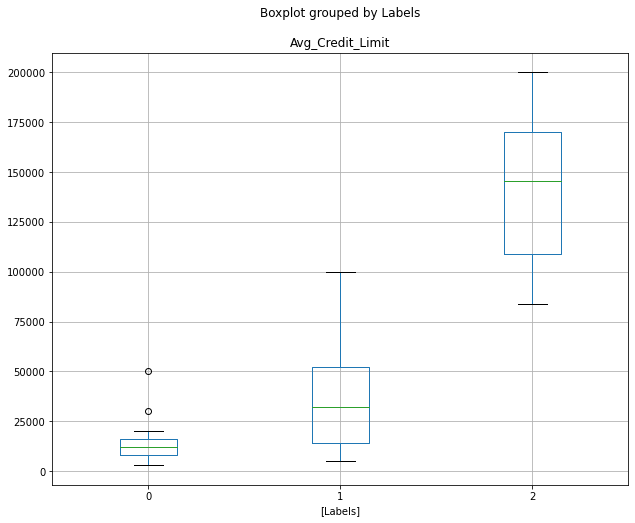

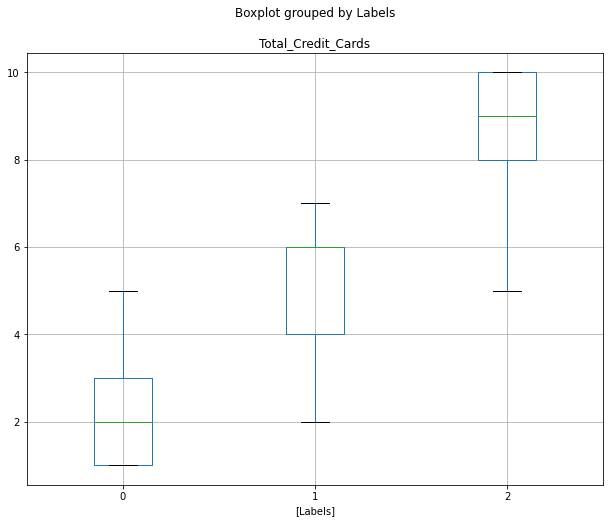

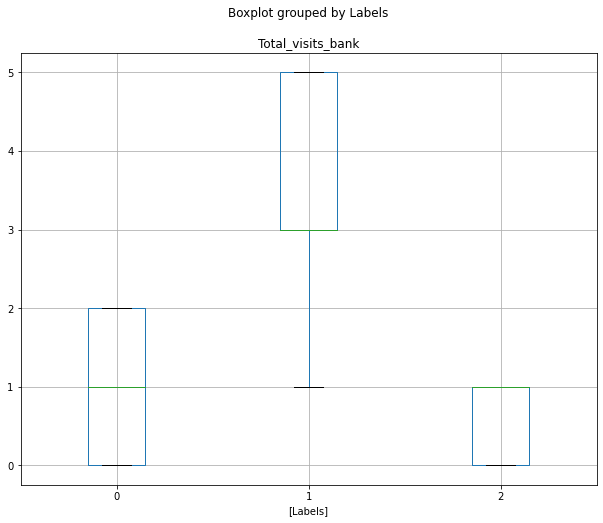

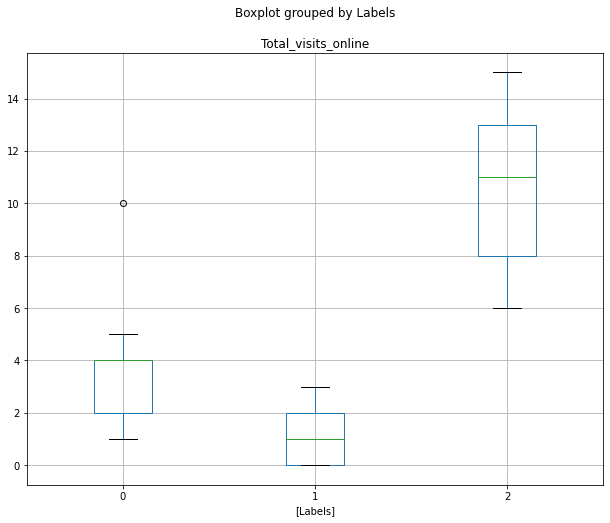

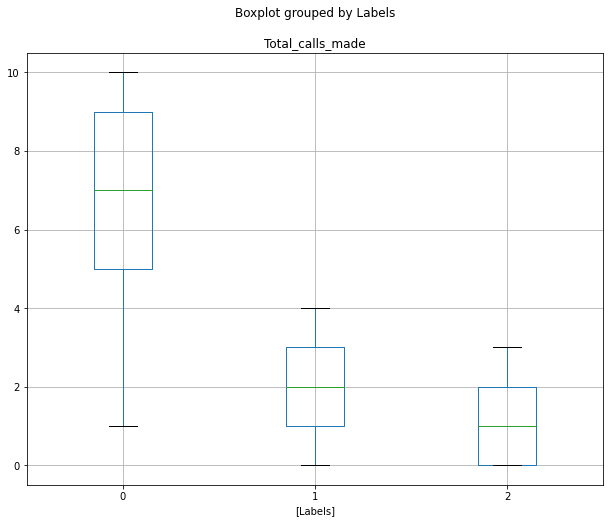

In [19]:
for i in data.columns[:-1]:
    data.loc[:,[i,'Labels']].boxplot(by = 'Labels', figsize=(10,8))
    plt.show()

In [20]:
mean = data.groupby('Labels').mean()
median = data.groupby('Labels').median()
data_kmeans = pd.concat([mean, median], axis=0)
data_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
data_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12319.819820,34082.228117,141040.00,12000.0,32000.0,145500.0
Total_Credit_Cards,2.423423,5.519894,8.74,2.0,6.0,9.0
Total_visits_bank,0.945946,3.490716,0.60,1.0,3.0,1.0
Total_visits_online,3.549550,0.981432,10.90,4.0,1.0,11.0
Total_calls_made,6.878378,1.986737,1.08,7.0,2.0,1.0


**Group 0:**<br>
Customers that have least credit limits around 12K on average. They also have the least number of credit cards 2e and these customers tend to make phone calls rather than making any kind of visit.

**Group 1:**<br>
Customers with around 34K(on average) as credit limit. They tend to have around 6 credit cards and tend to visit the bank more often than others.

**Group 2:**<br>
Customers with maximum credit limits(around 140K on average) and also maximum average number of credit cards(around 9 cards). They tend to make online transactions more often than others.